# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [23]:
# MOUNTING THE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *Imporing Libraries:*

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# *Our Data:*

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Capston Project/Health Insurance Cross Sell Prediction/HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [26]:
# FIRST 5 ROWS OF OUR DATA
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [27]:
# LAST 5 ROWS OF OUR DATA
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [28]:
# RANDOM 5 ROWS OF OUR DATA
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
341802,341803,Male,25,1,10.0,1,< 1 Year,No,30808.0,152.0,91,0
14660,14661,Female,29,1,2.0,0,< 1 Year,No,31742.0,152.0,190,0
319506,319507,Female,65,1,41.0,1,1-2 Year,No,36447.0,12.0,27,0
57489,57490,Female,34,1,28.0,0,1-2 Year,Yes,46918.0,124.0,37,0
299895,299896,Female,22,1,33.0,1,< 1 Year,No,34702.0,152.0,99,0


# *Data Preprocessing:*

In [29]:
# CREATING A BACKUP OF OUR DATA
df_backup = df.copy()

In [30]:
df.shape

(381109, 12)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Observations:**
1. There are 12 features with 381109 observations.
2. There are 3 categorical features and 9 numerical features.
3. The categorical features needed to be encoded.
4. There are no null values.

In [32]:
# STATISTICAL INFORAMTION OF NUMERICAL COLUMNS
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Observations:**
1. The average and maximum value of `Vintage` (i.e., Number of Days, Customer has been associated with the company) is 154 and 299 respectively.
2. So, we can say that no customer in this data set have benn with the company for 1 whole year.
3. The age of the oldest customer in this dataset is 85 years while median is 36 years.
4. The maximum annual premium is almost 17 times the median.
5. This data definitely needs scalling.

In [33]:
# STATISTICAL FEATURES OF CATEGORICAL COLUMNS
df.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


**Observations:**
1. The majority of health insurance owners are males.

In [34]:
# NUMBER OF UNIQUE VALUES
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

**Observation:**
1. `id` has only unique values (381109). So, it needs to be dropped.

In [35]:
# UNIQUE VALUES
for cols in df.drop(['id'], axis = 1).columns:
  print(f'\n** {cols} ----->')
  print(df[cols].unique())
  print('-' * 100)


** Gender ----->
['Male' 'Female']
----------------------------------------------------------------------------------------------------

** Age ----->
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
----------------------------------------------------------------------------------------------------

** Driving_License ----->
[1 0]
----------------------------------------------------------------------------------------------------

** Region_Code ----->
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
----------------------------------------------------------------------------------------------------

** Previously_Insured ----->
[0 1]
-----------------------------------

## *Handling Null values, Outliers and Encoding Process*

In [36]:
# LOOKING FOR NULL VALUES
df.isna().mean()

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

**Observation:**
1. There ae no null values.

In [37]:
# DROPPING `id` COLUMN
del df['id']
df.sample()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
53305,Female,23,1,28.0,0,1-2 Year,Yes,42112.0,26.0,62,0


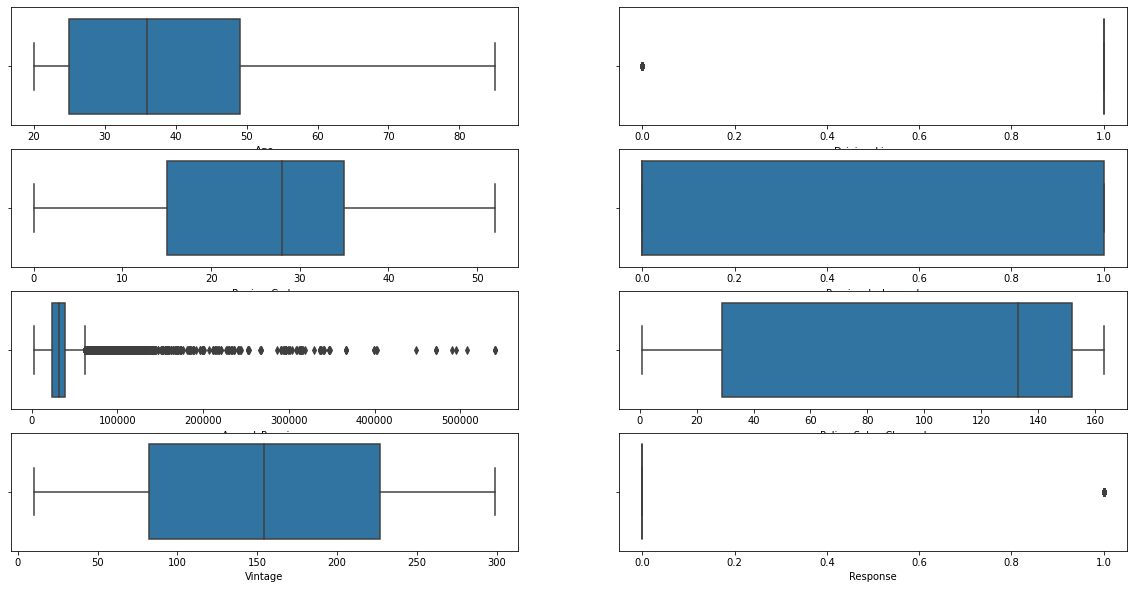

In [38]:
# PLOTTING BOX PLOT TO CHECK OUTLIERS
plt.figure(figsize = (20, 10))
x = 1

for cols in df.describe().columns:
    plt.subplot(4, 2, x)
    sns.boxplot(df[cols])
    x = x + 1

plt.show()

**Observations:**
1. From the box plot, we can say that there are a lot of outliers.
2. These are needed to be treated.

### *Encoding Object Columns*

In [39]:
# ENCODING GENDER
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0})
df.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
198646,0,24,1,50.0,0,< 1 Year,Yes,39462.0,152.0,253,0
105936,1,53,1,41.0,0,1-2 Year,No,37205.0,26.0,267,0
246589,0,26,1,28.0,1,< 1 Year,No,33479.0,152.0,111,0
349871,0,32,1,45.0,1,< 1 Year,No,35178.0,152.0,102,0
286507,0,29,1,41.0,1,< 1 Year,No,2630.0,152.0,108,0


In [41]:
# ENCODING Vehicle_Damage
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes' : 1, 'No' : 0})
df.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
14806,0,73,1,25.0,0,1-2 Year,1,33355.0,26.0,288,0
362168,0,25,1,13.0,0,< 1 Year,1,25913.0,152.0,41,0
73522,1,49,1,28.0,1,1-2 Year,0,26106.0,124.0,105,0
109574,1,22,1,46.0,0,< 1 Year,1,17621.0,152.0,235,0
208224,1,33,1,28.0,0,1-2 Year,0,48913.0,122.0,149,0


In [42]:
# ENCODING Vehicle_Age
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year' : 0, '1-2 Year' : 1, '> 2 Year' : 2})
df.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
316752,0,23,1,2.0,0,0.0,1,24287.0,152.0,110,0
252087,1,41,1,28.0,0,1.0,1,65835.0,124.0,212,1
219055,0,25,1,10.0,1,0.0,0,20014.0,152.0,143,0
373873,0,61,1,33.0,0,1.0,1,2630.0,156.0,241,0
129955,0,61,1,50.0,0,1.0,1,39197.0,26.0,84,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           365102 non-null  float64
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 32.0 MB


* Now every column become numerical.

# Data Visualization

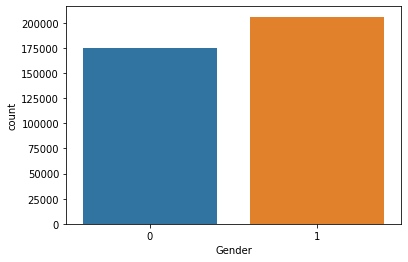

In [52]:
sns.countplot(df['Gender'])

**Observation:**
1. There are more males than female.

In [53]:
sns.countplot(x = 'Gender', y = 'Responses', data = df)

ValueError: ignored